In [93]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [94]:
%matplotlib inline

plt.rcParams["font.family"] = "Palatino"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

label_size = 22 + 2
tick_size = 20 + 2
title_size = 24 + 2
legend_size = 18

In [95]:
data = {
    'm': [],
    'VI': [],
    'method': [],
}
for m in range(2, 9):
    filename = f'mats/Dogs3-M{m}-DragDrop.mat'
    mat = loadmat(filename)
    for method in ['voiKmeansAmat', 'voiSpAmat', 'voiKmeansCVX', 'voiSpCVX']:
        vi = mat[method].ravel()[0]
        data['m'].append(m)
        data['VI'].append(vi)
        data['method'].append(method)

/Users/yichen/miniforge3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/yichen/miniforge3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


<Axes: xlabel='num', ylabel='vi'>

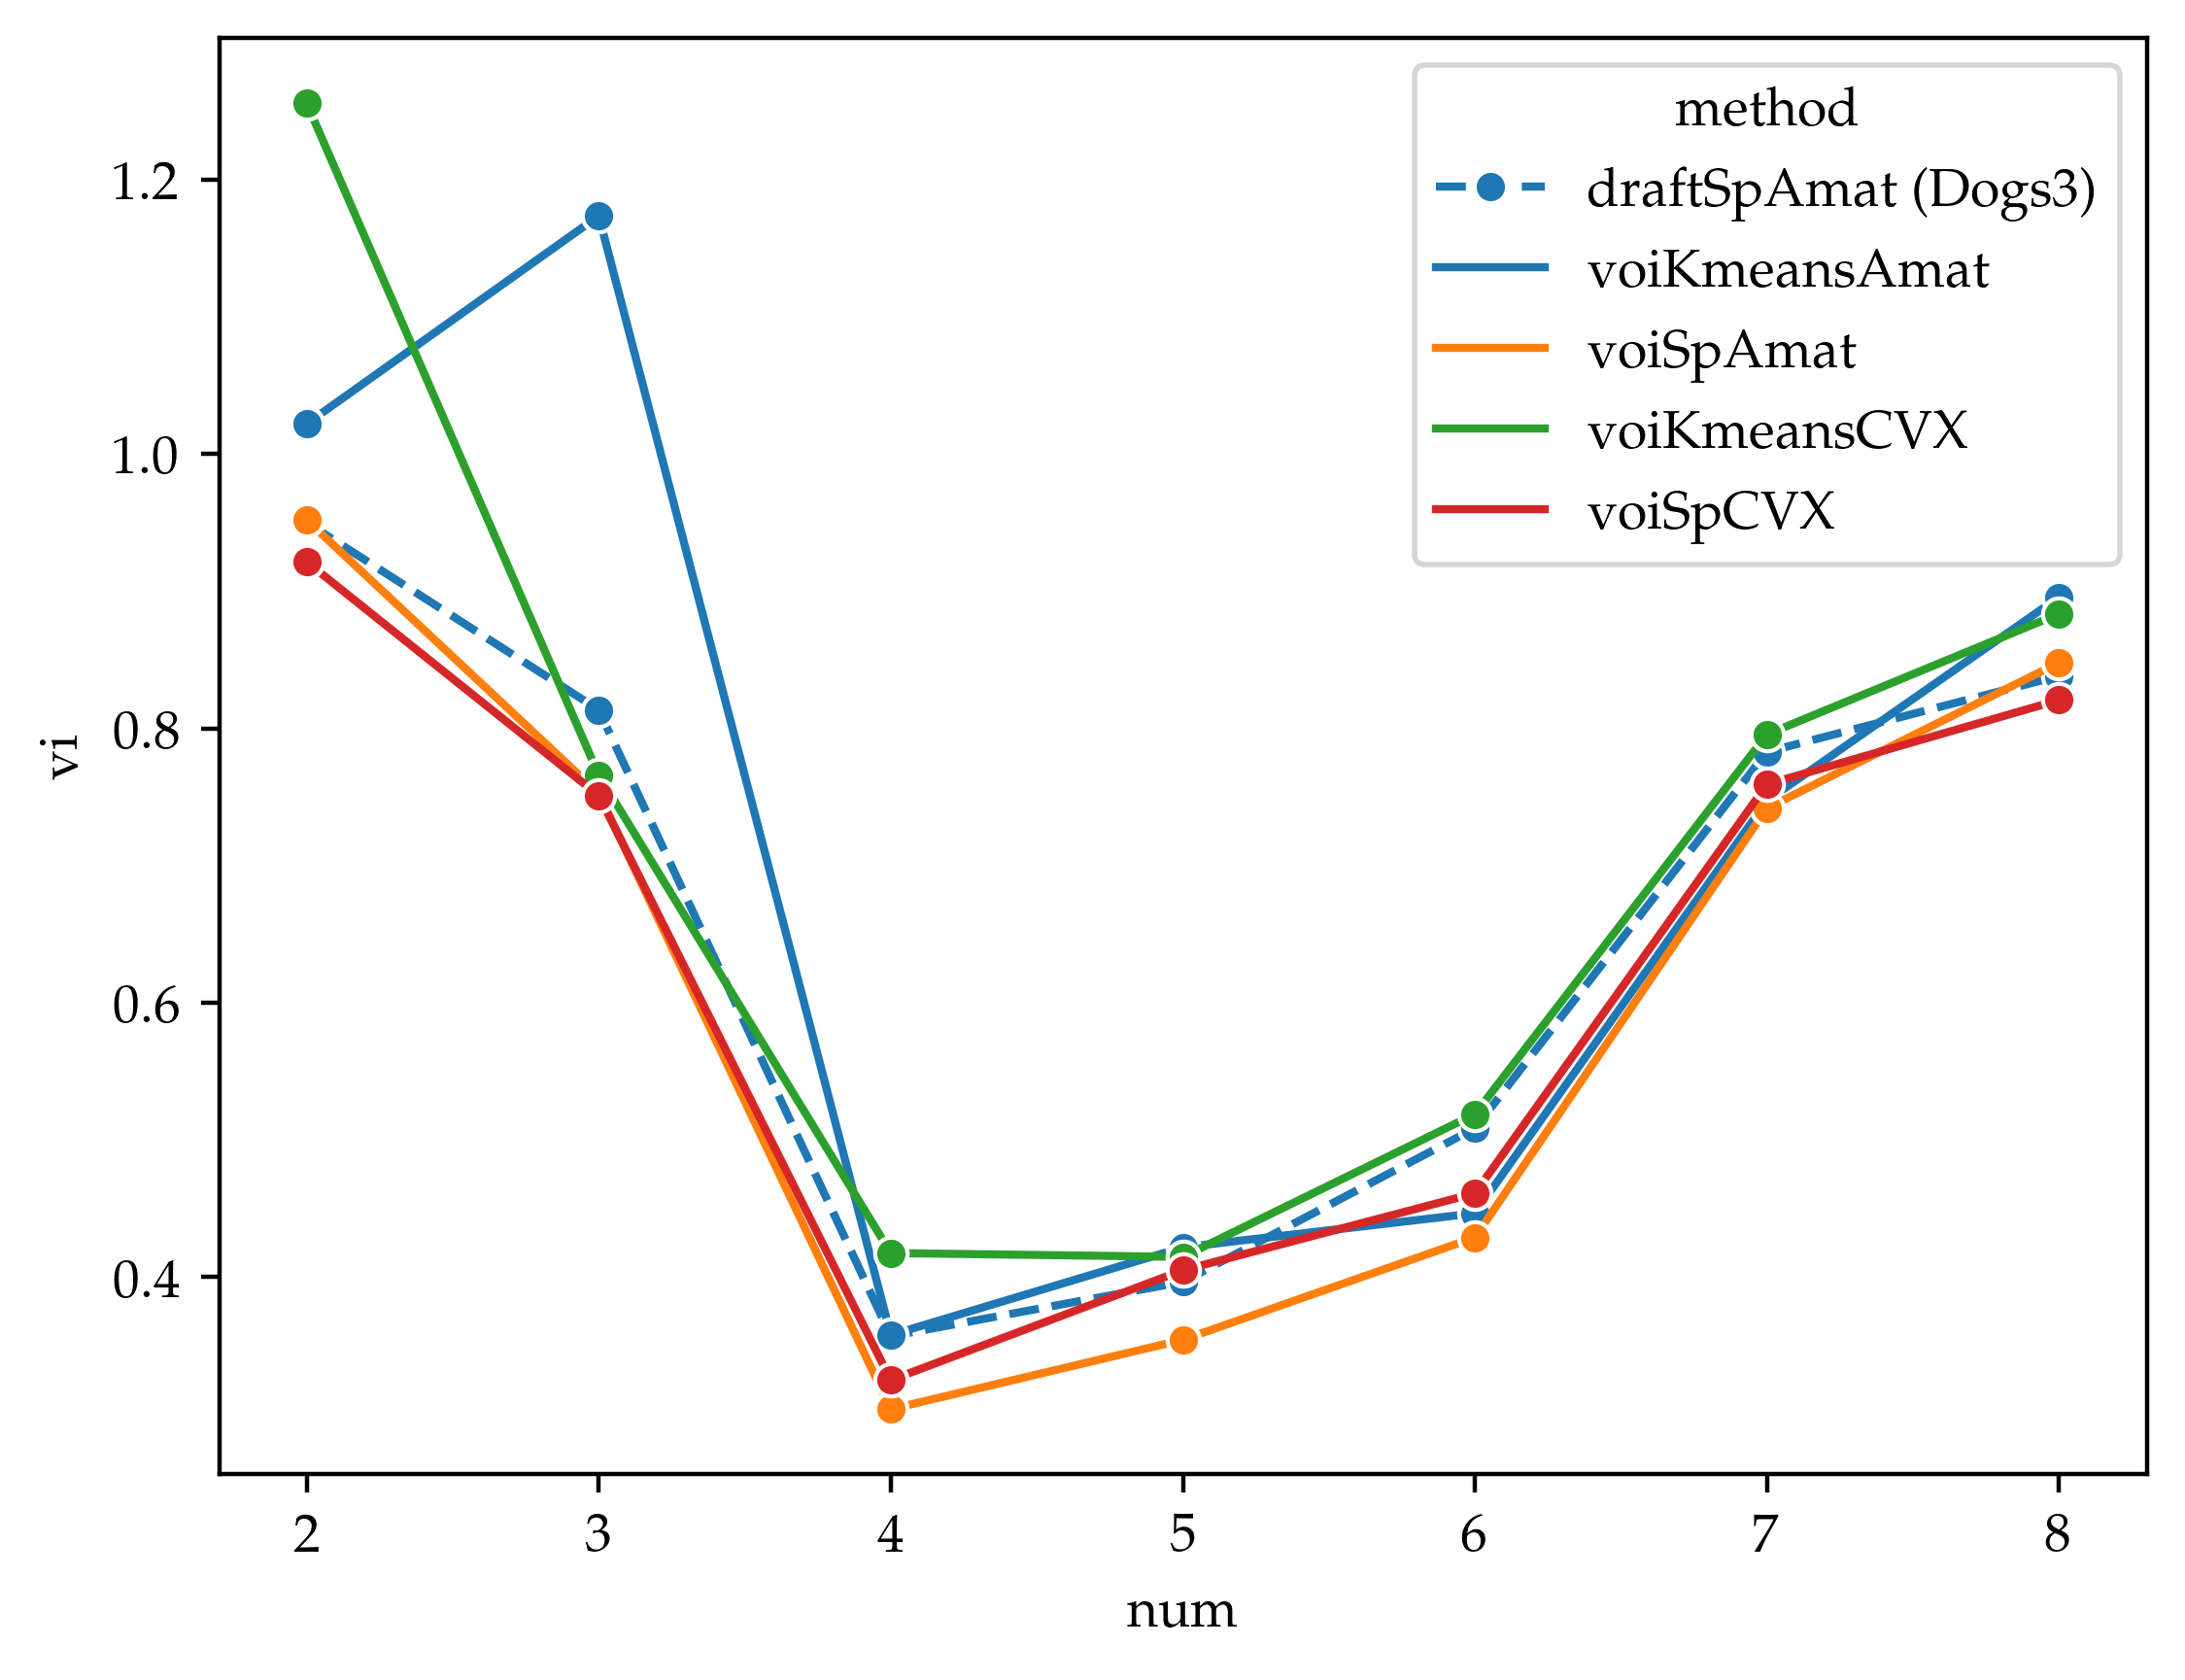

In [96]:
vi_df = pd.read_csv(f"./csv/vi_drag_and_drop.csv")
vi_df = vi_df[vi_df.dataset == 'dogs3']
sns.lineplot(data=vi_df, x="num", y="vi", err_style="bars",
             markers=True, marker='o', label='draftSpAmat (Dogs3)', linestyle='dashed')

sns.lineplot(x='m', y='VI', hue='method', data=data, markers=True, marker='o')

In [97]:
sorted(zip(vi_df.vi, vi_df.num), key=lambda x: x[0])

[(0.3569870218395012, 4),
 (0.3966005955189883, 5),
 (0.5085540358693623, 6),
 (0.782934976793064, 7),
 (0.8135566931898228, 3),
 (0.8383073682461293, 8),
 (0.9501087751725384, 2)]

In [98]:
from sklearn.cluster import SpectralClustering
from tools import vi as calc_vi
from tools import birds5_true_labels

In [99]:
data = {
    'm': [],
    'VI': [],
}
clustering = SpectralClustering(n_clusters=6, assign_labels='discretize', affinity='precomputed',random_state=0)
tru = birds5_true_labels()
for m in range(2, 9):
    filename = f'mats/Birds5-M{m}-DragDrop.mat'
    mat = loadmat(filename)
    a = mat['Amat'] * mat['CAmat']
    pred = clustering.fit(a).labels_
    vi = calc_vi(pred, tru)
    data['m'].append(m)
    data['VI'].append(vi)

/Users/yichen/miniforge3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/yichen/miniforge3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


<Axes: xlabel='num', ylabel='vi'>

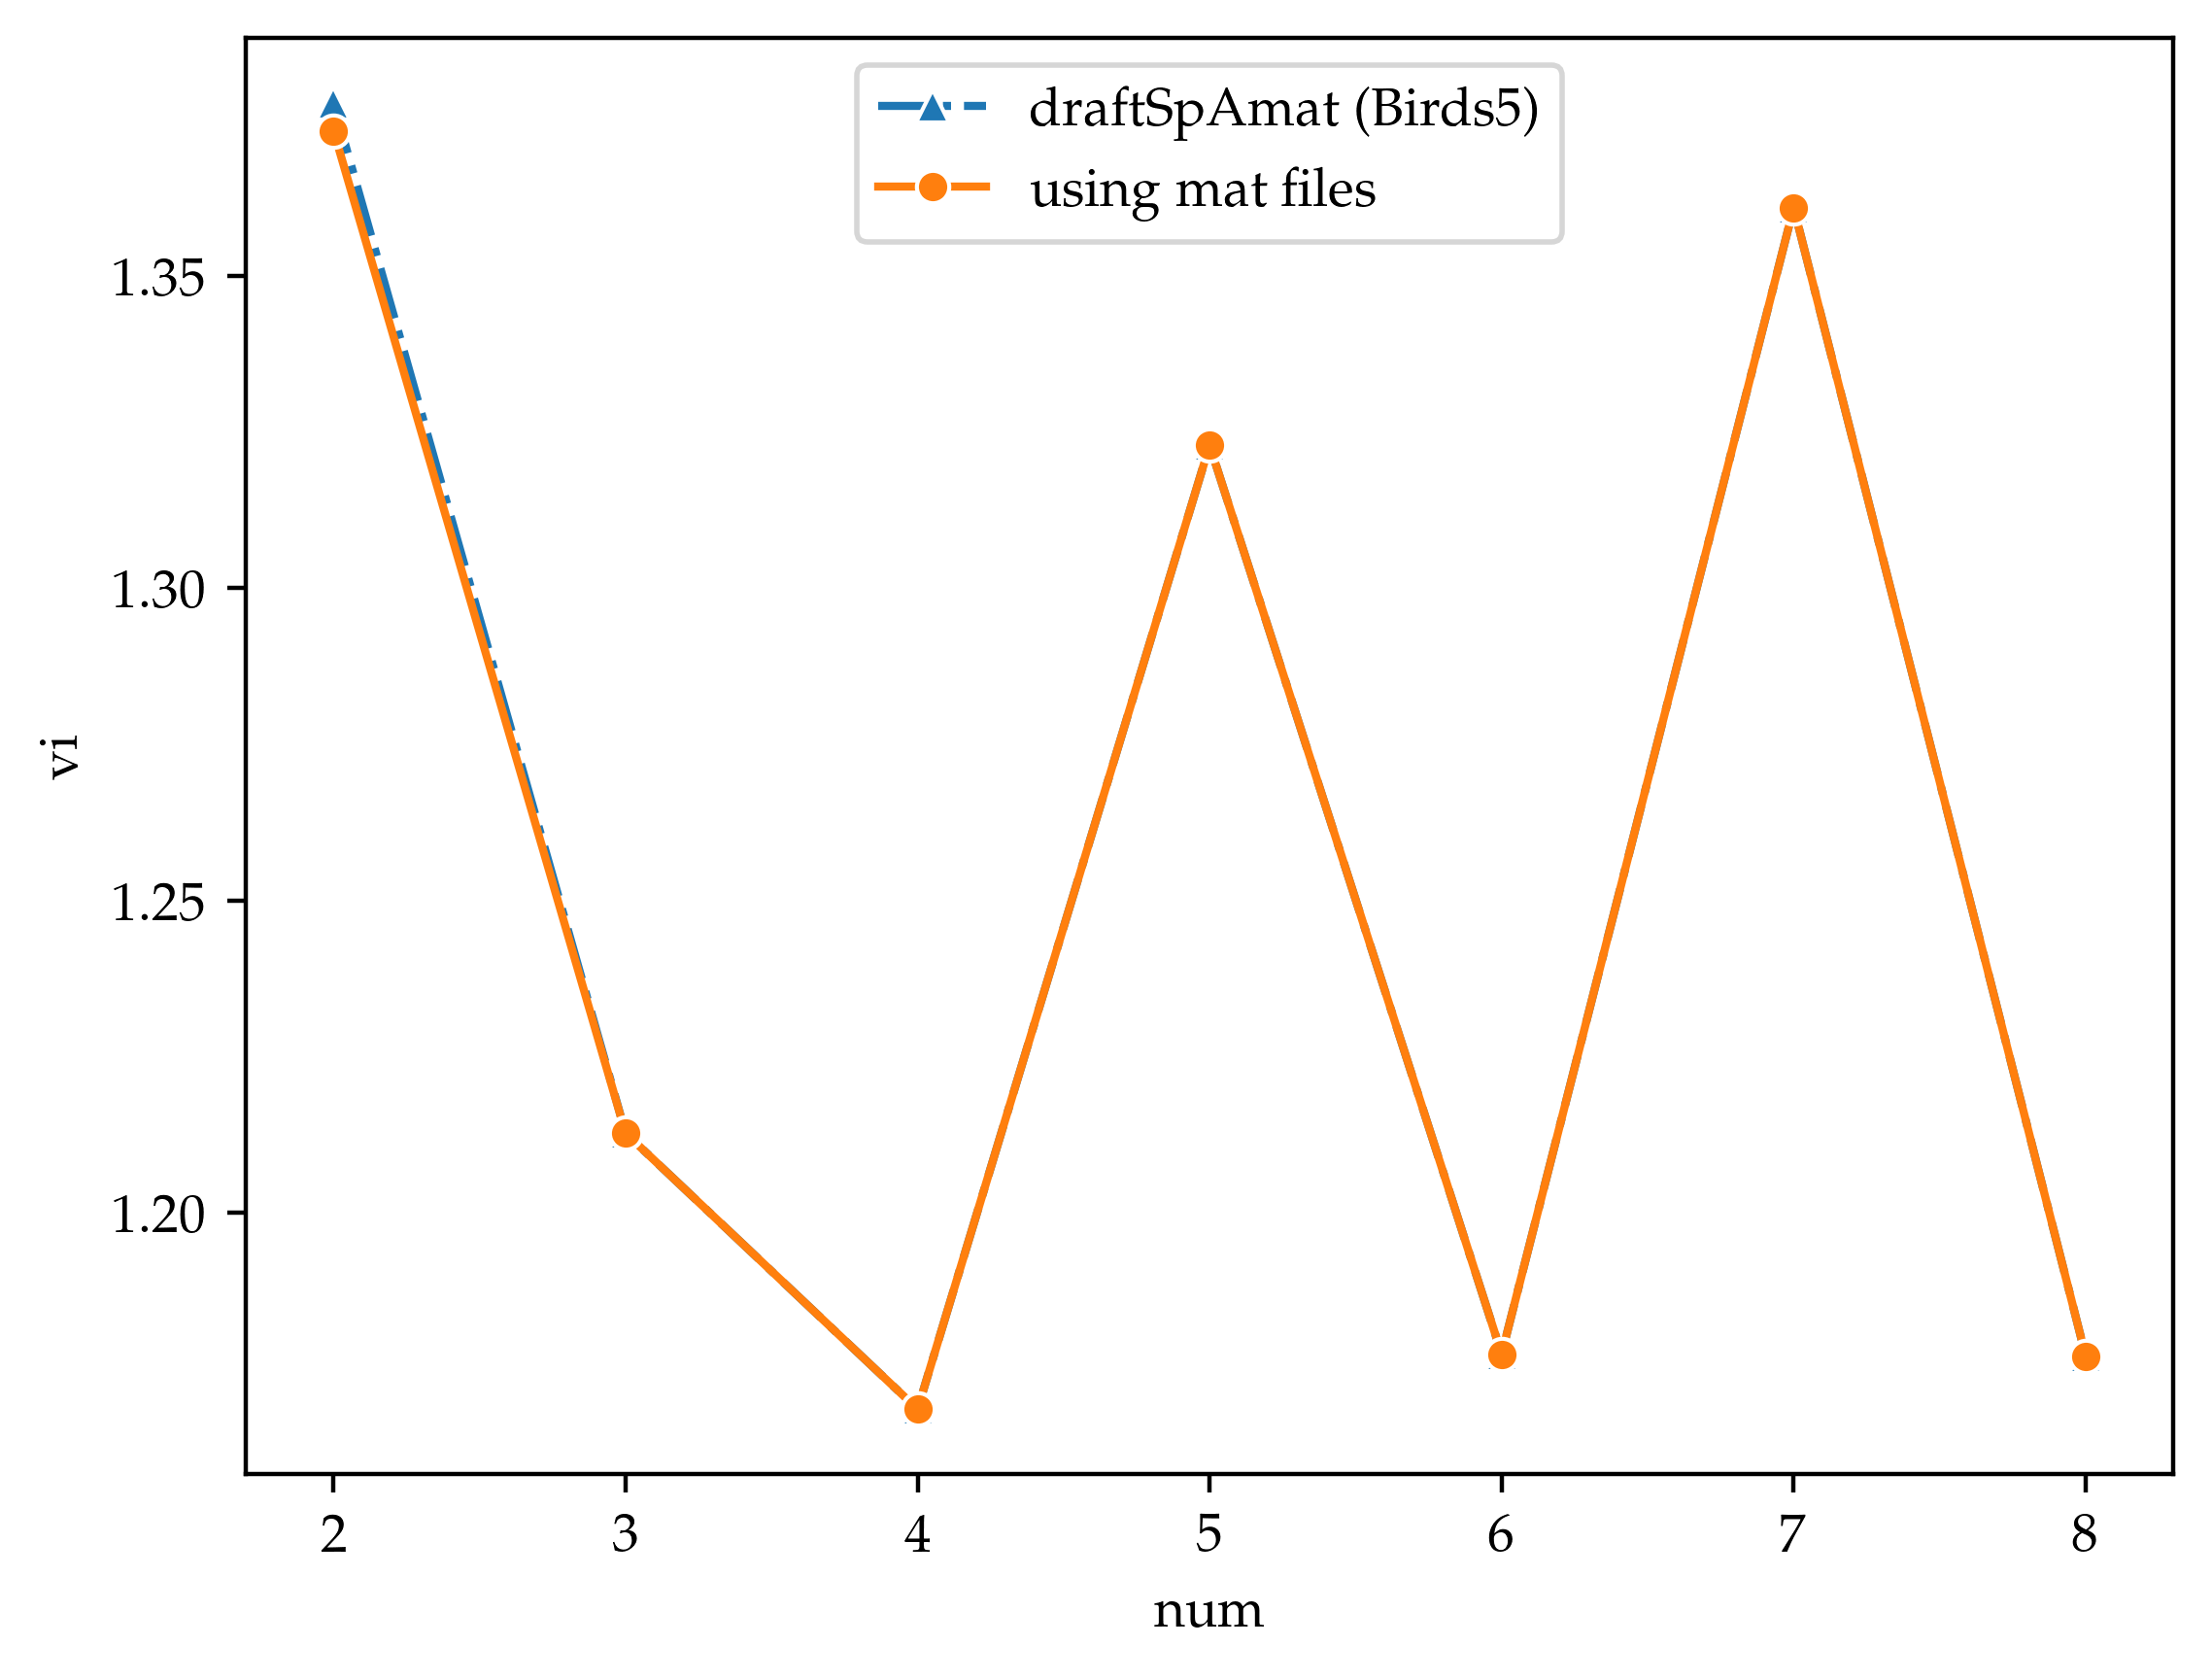

In [102]:
vi_df = pd.read_csv(f"./csv/vi_drag_and_drop.csv")
vi_df = vi_df[vi_df.dataset == 'birds5']
sns.lineplot(data=vi_df, x="num", y="vi", err_style="bars", markers=True,
             marker='^', label='draftSpAmat (Birds5)', linestyle='-.')
sns.lineplot(x='m', y='VI', data=data, markers=True, marker='o', label='using mat files')

In [103]:
data = {
    'm': [],
    'VI': [],
    'method': [],
}
for m in range(2, 9):
    filename = f'mats/Birds5-M{m}-DragDrop.mat'
    mat = loadmat(filename)
    for method in ['voiKmeansAmat', 'voiSpAmat', 'voiKmeansCVX', 'voiSpCVX']:
        vi = mat[method].ravel()[0]
        data['m'].append(m)
        data['VI'].append(vi)
        data['method'].append(method)

/Users/yichen/miniforge3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/yichen/miniforge3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


<Axes: xlabel='num', ylabel='vi'>

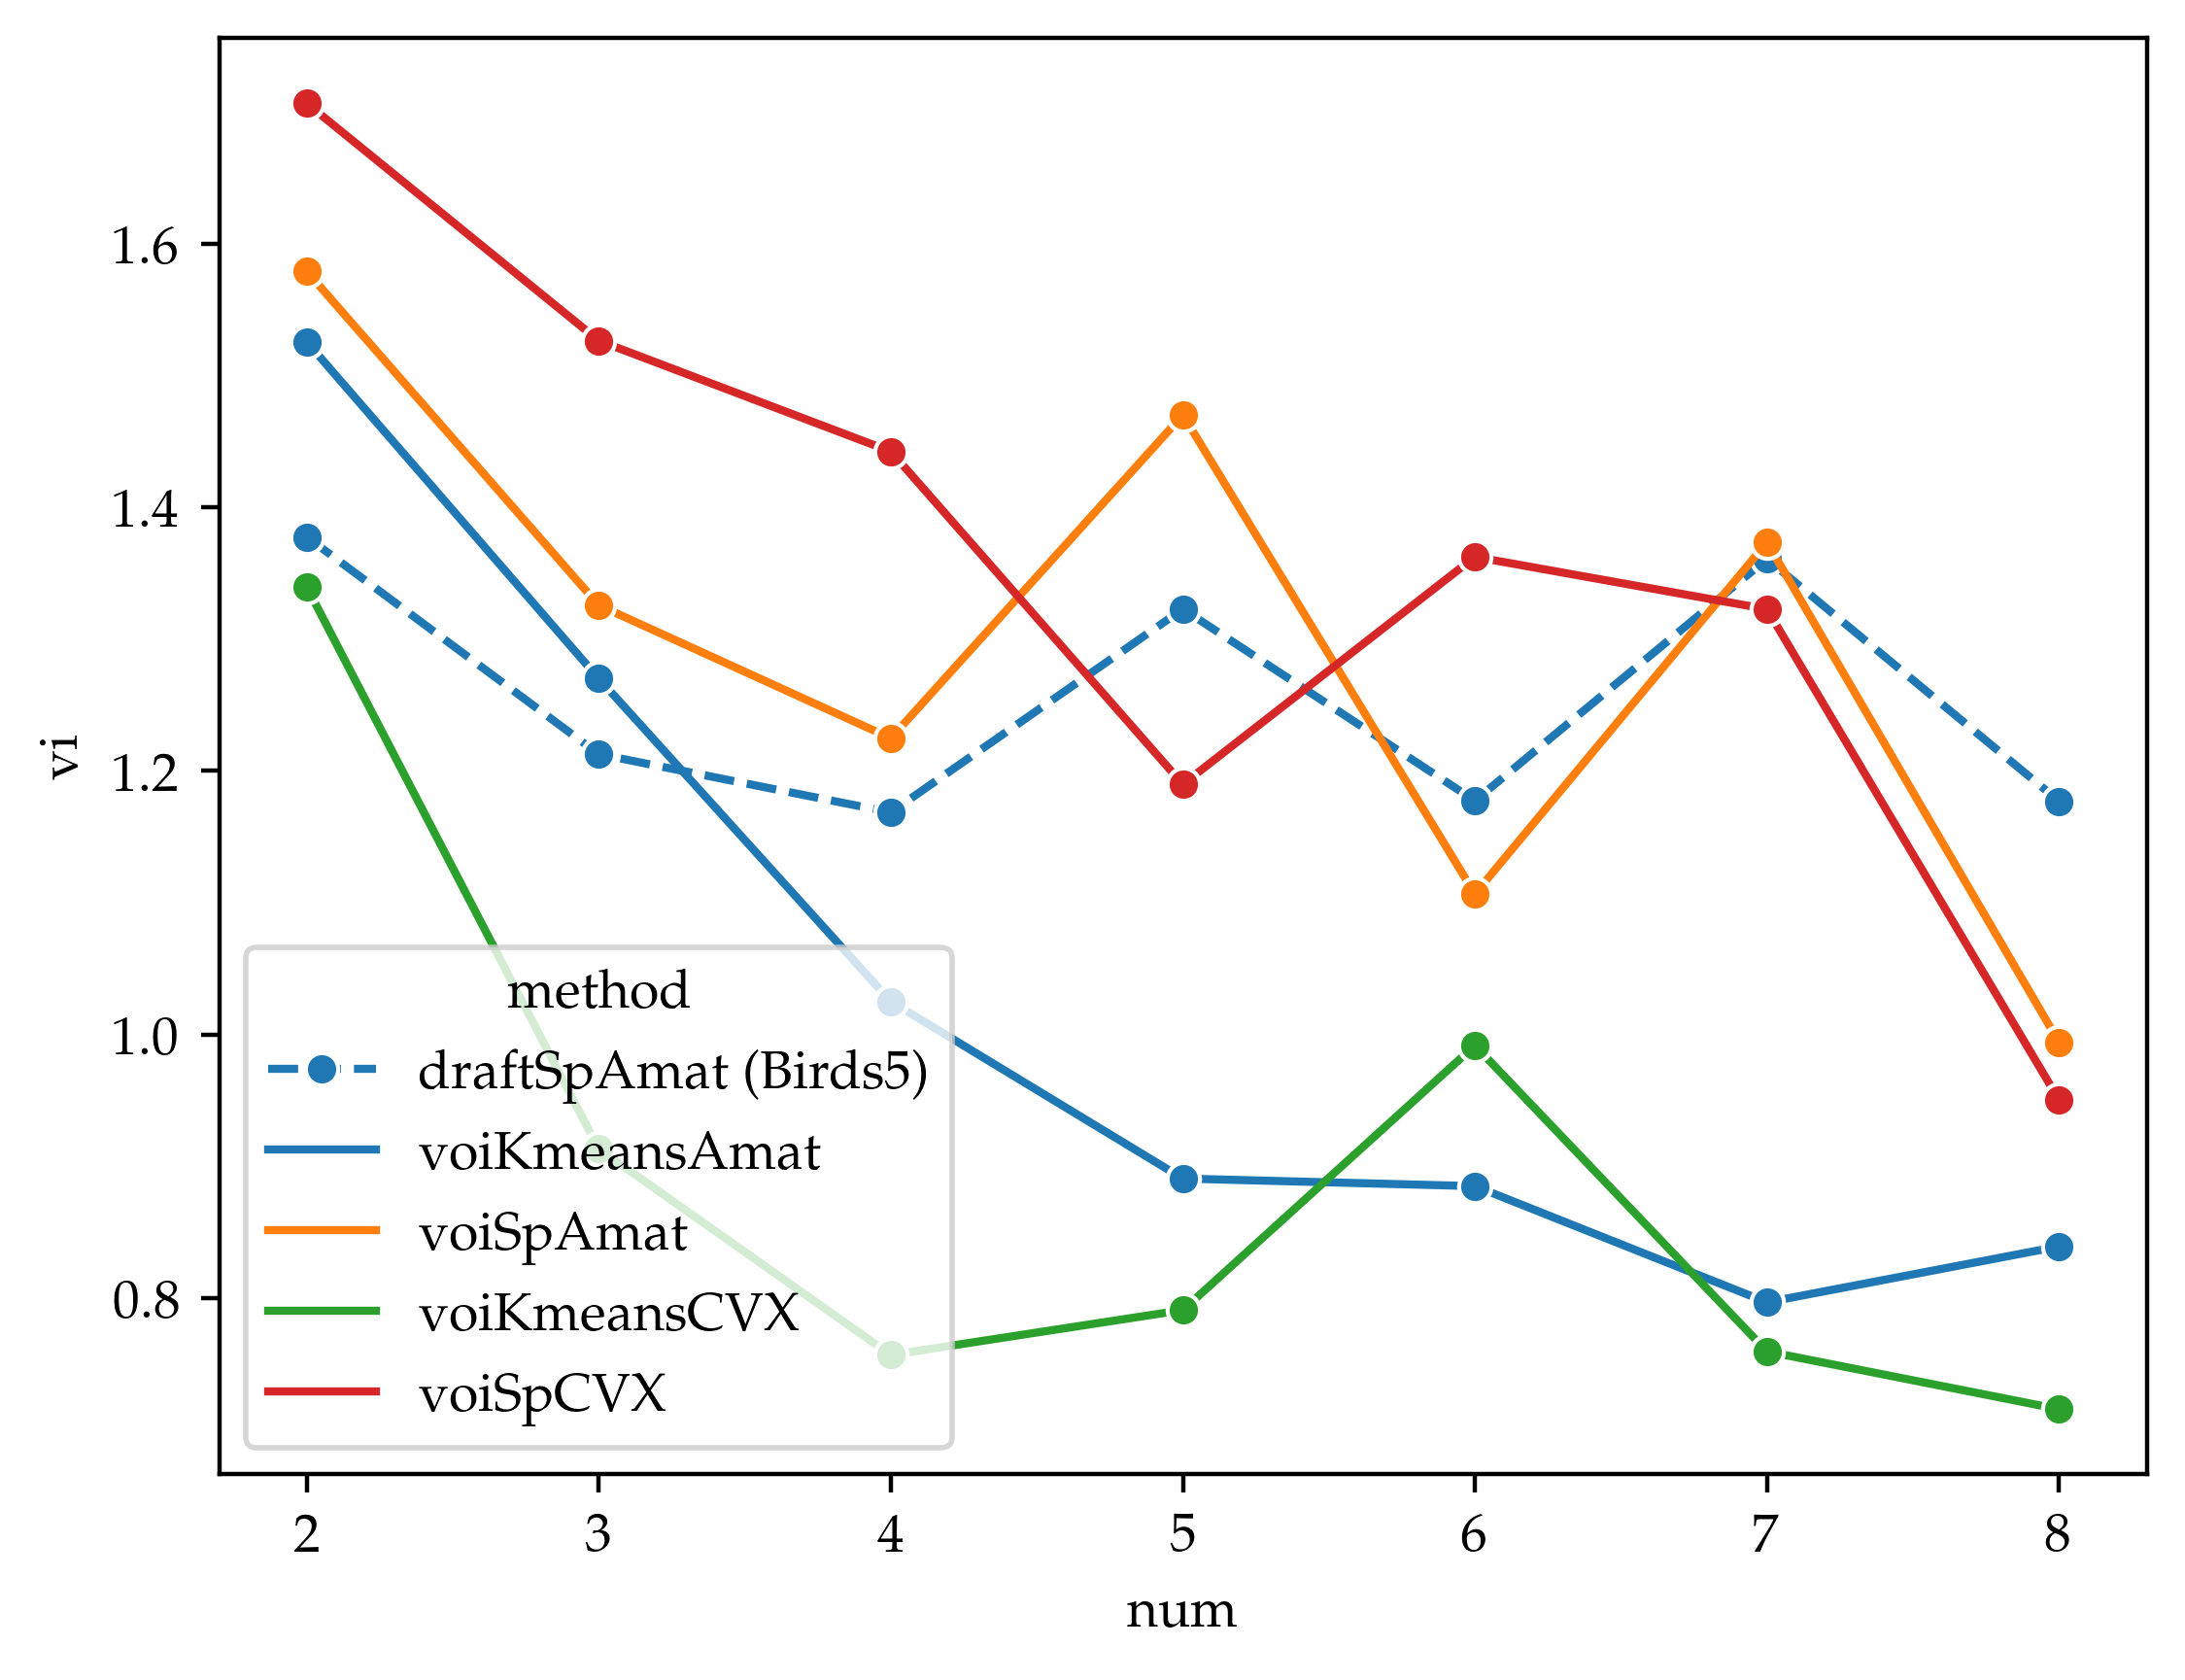

In [104]:
vi_df = pd.read_csv(f"./csv/vi_drag_and_drop.csv")
vi_df = vi_df[vi_df.dataset == 'birds5']
sns.lineplot(data=vi_df, x="num", y="vi", err_style="bars", markers=True,
             marker='o', label='draftSpAmat (Birds5)', linestyle='dashed')
sns.lineplot(x='m', y='VI', hue='method', data=data, markers=True, marker='o')